## 🛒 Supermarket Dataset for Predictive Marketing 2023
Hunter’s e-grocery is an emerging lifestyle brand with a presence in 10 counties. In this project, we explore customer purchasing behavior to support informed, data-driven marketing decisions—especially considering disruptions like COVID-19, economic uncertainty, and changing shopping patterns.

📌 Problem Statement
The goal is to analyze and model shopping behavior using supermarket transaction data. By understanding patterns in order frequency, timing, and product preference, the company can enhance its marketing strategies and product recommendations.

🔍 Key Steps in the Project
* Exploratory Data Analysis (EDA):
* Assessed order trends by day and hour
* Grouped customers by order history
* Visualized product popularity
* Feature Engineering:
* Created custom time-of-day and frequency-based groupings
* Encoded categorical features for modeling
* Clustering & Segmentation:
* Explored PCA and time-based behavior groupings
* Predictive Modeling:
* Trained a Random Forest Regressor to predict reorder likelihood
* Achieved very high performance (R² ≈ 1.0)

🤖 Models Used
* Model	Metric	Score
* Random Forest Regressor	R²	1.00

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import phik 
from phik.report import plot_correlation_matrix
from phik import report

### Import data and analysis

In [3]:
df=pd.read_csv('ECommerce_consumer behaviour.csv')

In [4]:
df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,NaN,91,6,0,16,dairy eggs,soy lactosefree
6,2425083,49125,1,2,18,NaN,120,7,0,16,dairy eggs,yogurt
7,2425083,49125,1,2,18,NaN,59,8,0,15,canned goods,canned meals beans
8,2425083,49125,1,2,18,NaN,35,9,0,12,meat seafood,poultry counter
9,1944304,162867,1,3,17,NaN,37,1,0,1,frozen,ice cream ice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [9]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

Only one column, days_since_prior_order, contains missing values.

All other columns — including order metadata, user IDs, product info, and cart actions — are fully complete (no missing data).

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [12]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [13]:
# Fill missing values in 'days_since_prior_order' with 0,
# since NaN indicates a first-time order with no prior purchase.
# Also create a new column 'is_first_order' to flag these rows,
# giving the model extra context to distinguish new vs. returning customers.
df['days_since_prior_order']=df['days_since_prior_order'].fillna('0')
df['days_since_prior_order']=df['days_since_prior_order'].astype(int)

### Number of purchases by day

array([<Axes: ylabel='count'>], dtype=object)

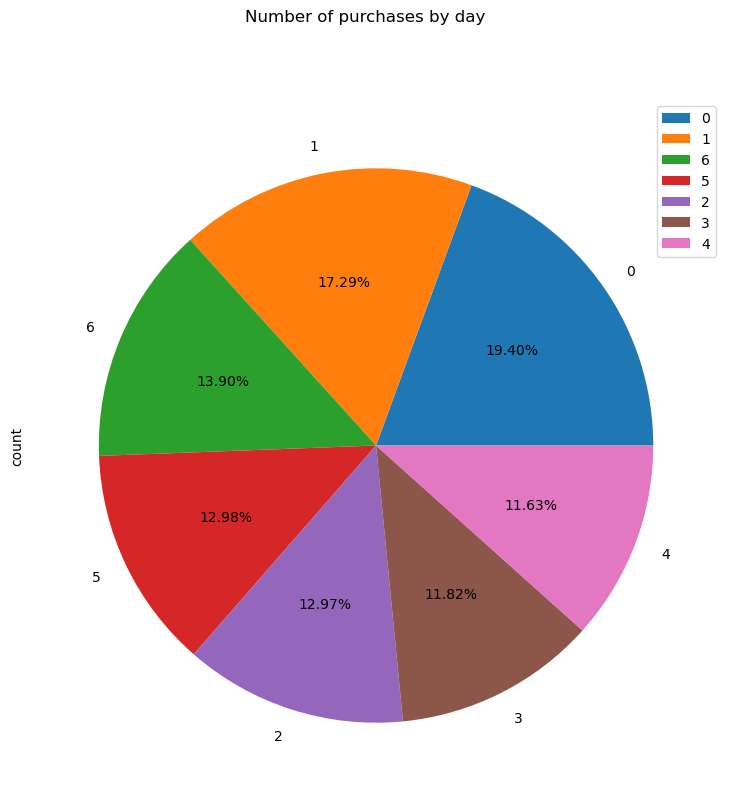

In [14]:
# Group the data by day of the week (order_dow)
# Count the number of purchases (by counting user_id entries per day)
# Sort the results in descending order by count
# Plot the result as a pie chart showing the percentage of total purchases per day
df.groupby('order_dow')['user_id'] \
  .agg(['count']) \
  .sort_values(by='count', ascending=False) \
  .plot(kind='pie', 
        autopct='%1.2f%%',        # Show percentage with 2 decimals
        subplots=True,            # Required for pie charts in pandas
        title='Number of purchases by day', 
        figsize=(9, 9))           # Set the chart size


### Time of day, when the order was made

In [52]:
# Group the dataset by 'order_hour_of_day' (0 to 23 = hours in a day)
# Count how many orders (via user_id) were made in each hour
# Sort the result in descending order to see peak shopping hours
df.groupby('order_hour_of_day', as_index=False) \
  .agg({'user_id':'count'}) \
  .sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
12,12,163511
16,16,158247
9,9,150248
17,17,129383
8,8,106754


In [53]:
# Define a function to categorize hours into time-of-day segments
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x

In [54]:
# Apply the order_time function to the 'order_hour_of_day' column
# Create a new column 'order_time_list' to store the time period for each order
df['order_time_list'] = df['order_hour_of_day'].apply(order_time)

In [18]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,The order was made in the evening
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,The order was made in the evening
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,The order was made in the evening
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,The order was made in the evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,The order was made in the evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,The order was made in the evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,The order was made in the evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,The order was made in the evening


<Axes: title={'center': 'Time of day when the order was made'}, xlabel='order_time_list'>

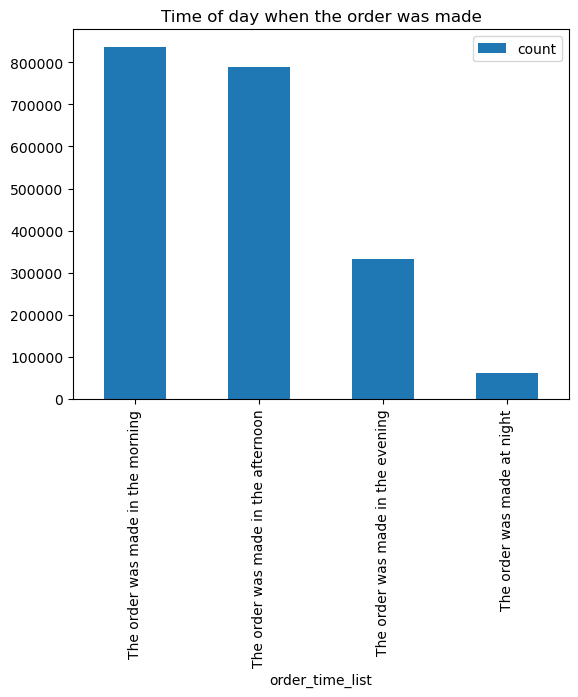

In [55]:
# Group the data by the 'order_time_list' column (morning, afternoon, etc.)
# Count the number of orders (by counting user_id entries) in each time segment
# Sort the results in descending order to show most active time slots first
# Plot the counts as a bar chart with a title
df.groupby('order_time_list')['user_id'] \
  .agg(['count']) \
  .sort_values(by='count', ascending=False) \
  .plot(kind='bar',                         # Bar chart to show order volume per time segment
        title='Time of day when the order was made')  # Chart title

### The time  when the order was made by day and time of day

In [56]:
# Create a pivot table to analyze the volume of orders by day of week and time of day
# 'order_dow' becomes the row index (0=Sunday to 6=Saturday)
# 'order_time_list' (Morning, Afternoon, Evening, Night) becomes the columns
# For each combination, count how many user_id entries (i.e., orders) occurred
df.pivot_table(index='order_dow',
               columns='order_time_list',
               values='user_id',
               aggfunc='count')

order_time_list,The order was made at night,The order was made in the afternoon,The order was made in the evening,The order was made in the morning
order_dow,,,,
0,11157,162933,60195,157546
1,8850,130205,51825,158356
2,7926,100223,45497,108266
3,7199,94072,41737,95722
4,8017,89207,45359,92301
5,8607,101113,42311,110126
6,9544,111241,45737,114229


<Axes: title={'center': 'The time when the order was made by day and time of day'}, xlabel='order_dow'>

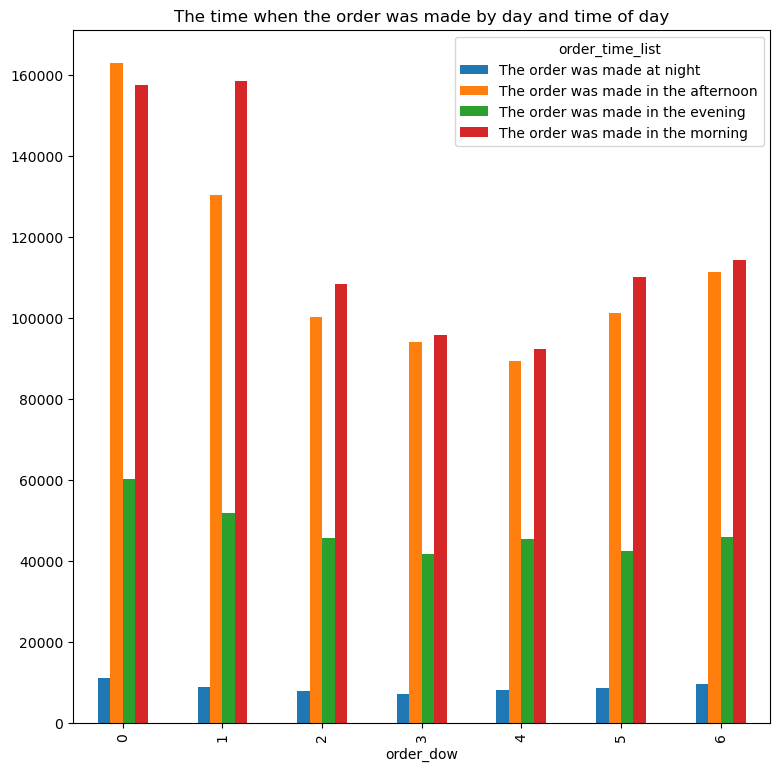

In [57]:
# Create a pivot table showing the number of orders per day of the week and time of day
# - 'order_dow' is the index (rows): 0=Sunday, ..., 6=Saturday
# - 'order_time_list' is the columns (Morning, Afternoon, Evening, Night)
# - 'user_id' values are counted to represent total orders in each time slot
df.pivot_table(index='order_dow',
               columns='order_time_list',
               values='user_id',
               aggfunc='count') \
  .plot(kind='bar',                          # Plot the pivot table as a grouped bar chart
        title='The time when the order was made by day and time of day',
        figsize=(9, 9))                      # Set figure size for better visibility


This chart shows order volume by day of the week and time of day.

Most orders are placed in the morning and afternoon, especially on Sundays and Mondays.

Nighttime orders are the least frequent across all days.

### The number of orders that users have made

In [58]:
# Group the dataset by 'order_number', which represents the sequence number of each customer's order
# Count how many users placed an order at each specific order number (e.g., how many placed a first order, second, etc.)
df.groupby('order_number')['user_id'].agg(['count'])


,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


Result Interpretation:

* order_number = 1: 124,342 users placed their first order

* order_number = 2: 122,397 users placed their second order

* And so on, showing customer retention over time

* As expected, the number decreases — not all customers return for many future purchases

In [59]:
# Define a function to categorize order_number into buckets (1-20, 21-40, ..., 81-100)
def order_number_group(x):
    if x <= 20:
        x = '1-20 orders'
    elif x > 20 and x <= 40:
        x = '21-40 orders'
    elif x > 40 and x <= 60:
        x = '41-60 orders'
    elif x > 60 and x <= 80:
        x = '61-80 orders'
    else:
        x = '81-100 orders'
    return x


In [61]:
# Apply the 'order_number_group' function to each value in the 'order_number' column
# This assigns a group label (like '1–20 orders') based on the order number
# The result is stored in a new column called 'order_number_group'
df['order_number_group'] = df['order_number'].apply(order_number_group)


In [25]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,The order was made in the evening,1-20 orders
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening,1-20 orders
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,The order was made in the evening,1-20 orders
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,The order was made in the evening,41-60 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,The order was made in the evening,41-60 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,The order was made in the evening,41-60 orders


array([<Axes: ylabel='count'>], dtype=object)

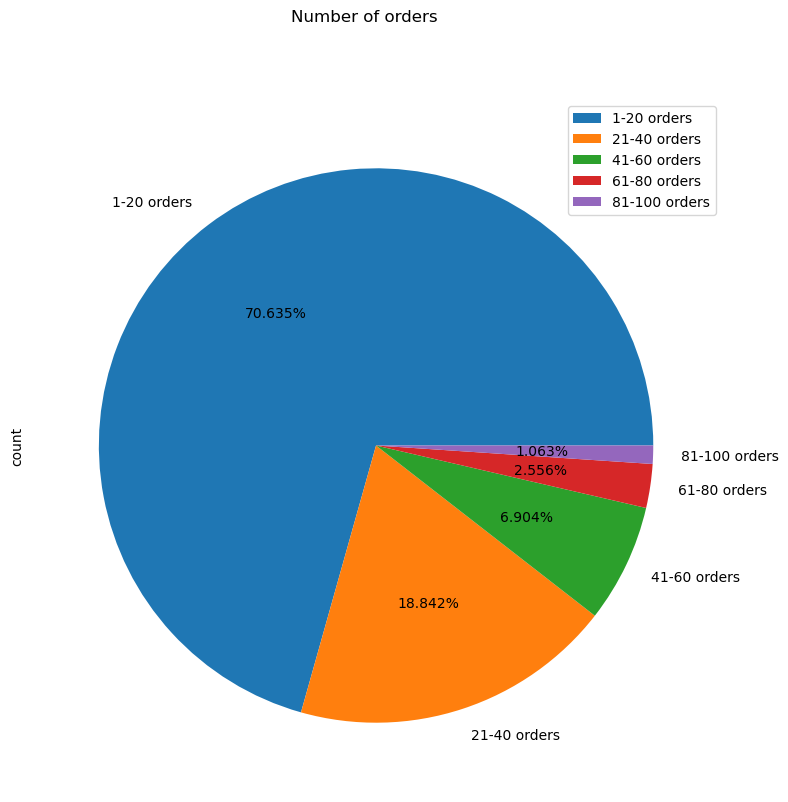

In [ ]:
# Group the data by the new 'order_number_group' category
# Count how many users (orders) fall into each order group
# Sort the groups from highest to lowest count
# Plot the results as a pie chart to show the percentage share of each order frequency group
df.groupby('order_number_group')['user_id'] \
  .agg(['count']) \
  .sort_values(by='count', ascending=False) \
  .plot(kind='pie',                      # Plot as a pie chart
        autopct='%1.3f%%',               # Show percentages with 3 decimal places
        subplots=True,                   # Required for pie chart in pandas
        title='Number of orders',        # Chart title
        figsize=(9, 9))                  # Set the chart size


### How many days have passed since the pre-order

<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

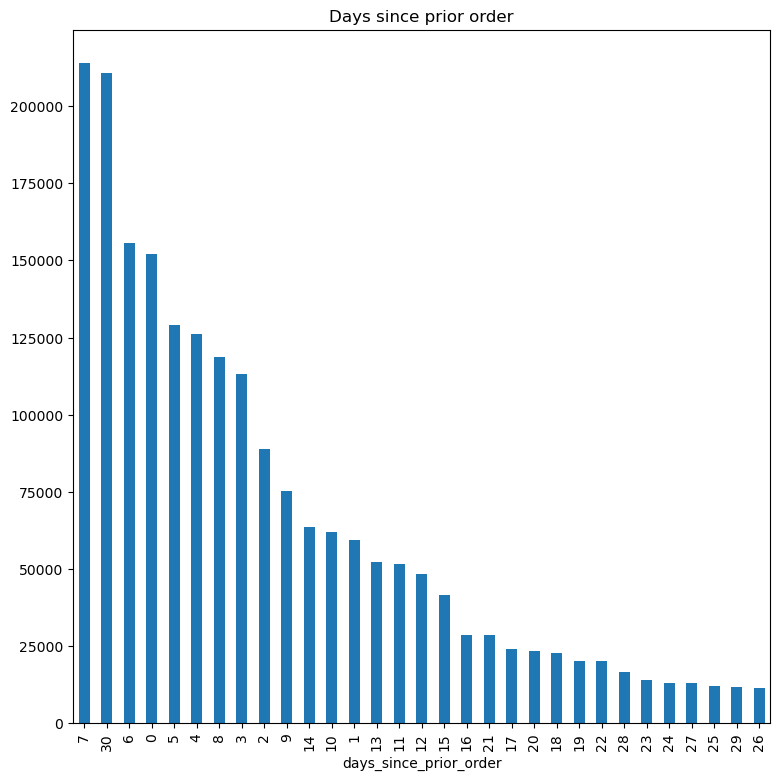

In [62]:
# Group the dataset by 'days_since_prior_order'
# Count how many orders were placed after each number of days
# Sort the result in descending order to show the most common reorder intervals
# Plot the counts as a bar chart
df.groupby('days_since_prior_order')['user_id'] \
  .agg('count') \
  .sort_values(ascending=False) \
  .plot(kind='bar',                        
        title='Days since prior order',    
        figsize=(9, 9))                    


### Top 15 most popular products from users

array([<Axes: ylabel='count'>], dtype=object)

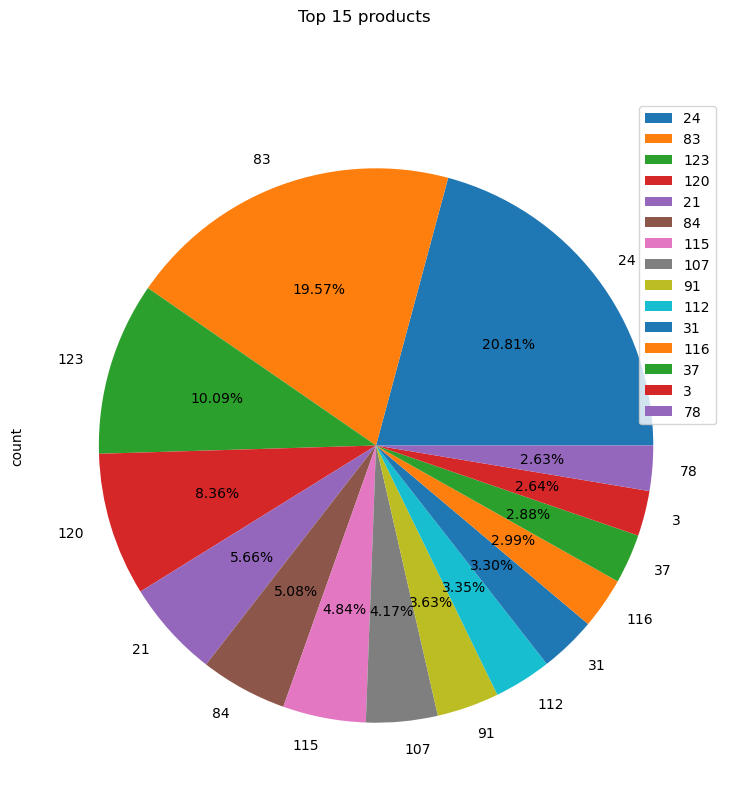

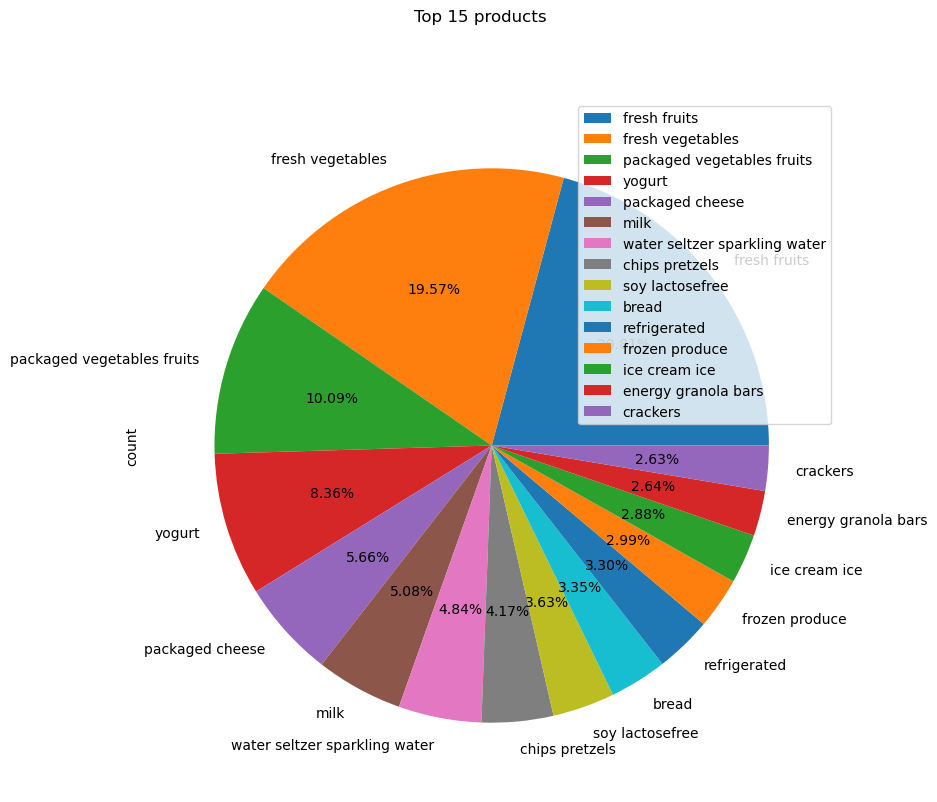

In [ ]:
# Group by 'product_id' to count how many times each product was ordered
# Sort the counts in descending order to get the most frequently ordered products
# Select the top 15 products and plot as a pie chart
df.groupby('product_id')['user_id'] \
  .agg(['count']) \
  .sort_values(by='count', ascending=False) \
  .head(15) \
  .plot(kind='pie',
        autopct='%1.2f%%',               # Show percentage with 2 decimal places
        subplots=True,                   # Needed for pie chart layout
        title='Top 15 products',
        figsize=(9, 9))                  

# Same logic, but using 'product_name' for a more readable chart
df.groupby('product_name')['user_id'] \
  .agg(['count']) \
  .sort_values(by='count', ascending=False) \
  .head(15) \
  .plot(kind='pie',
        autopct='%1.2f%%',
        subplots=True,
        title='Top 15 products',
        figsize=(9, 9))


### How many products users add to the cart

In [64]:
# Group the data by 'add_to_cart_order', which represents the position a product was added in the cart
# Count how many products were added at each position (using 'user_id' as a proxy for order count)
# Sort the result in descending order to find the most common add-to-cart positions
atco_u = df.groupby('add_to_cart_order', as_index=False) \
           .agg({'user_id': 'count'}) \
           .sort_values(by='user_id', ascending=False)


<Axes: xlabel='user_id', ylabel='Count'>

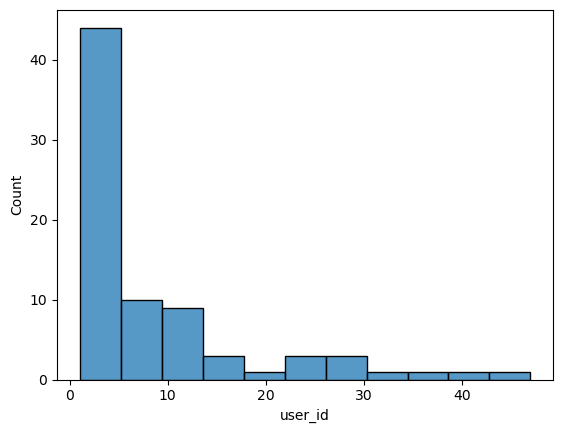

In [ ]:
sns.histplot(data=atco_u.query('user_id < 50'), x='user_id', kde=False)


### How many products were added to the cart 

In [31]:
on_atco=df.groupby('order_number',as_index=False).agg({'add_to_cart_order': 'count'}).sort_values(by='add_to_cart_order',ascending=False)

<Axes: xlabel='add_to_cart_order', ylabel='Count'>

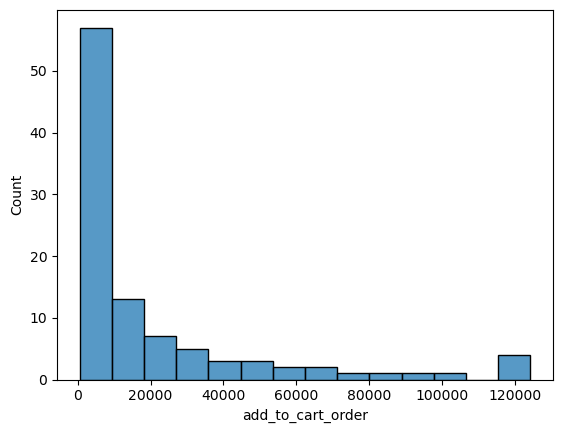

In [69]:
sns.histplot(data=on_atco, x='add_to_cart_order', kde=False)

### Reordereds

In [33]:
df['reordered'].value_counts()

reordered
1    1190986
0     828515
Name: count, dtype: int64

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

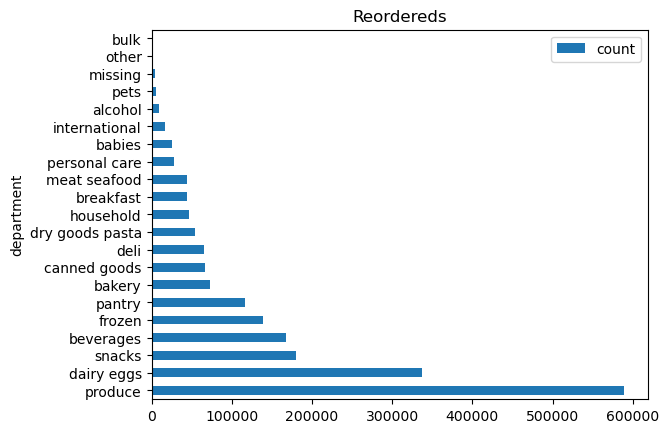

In [34]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh', title='Reordereds')

array([<Axes: ylabel='count'>], dtype=object)

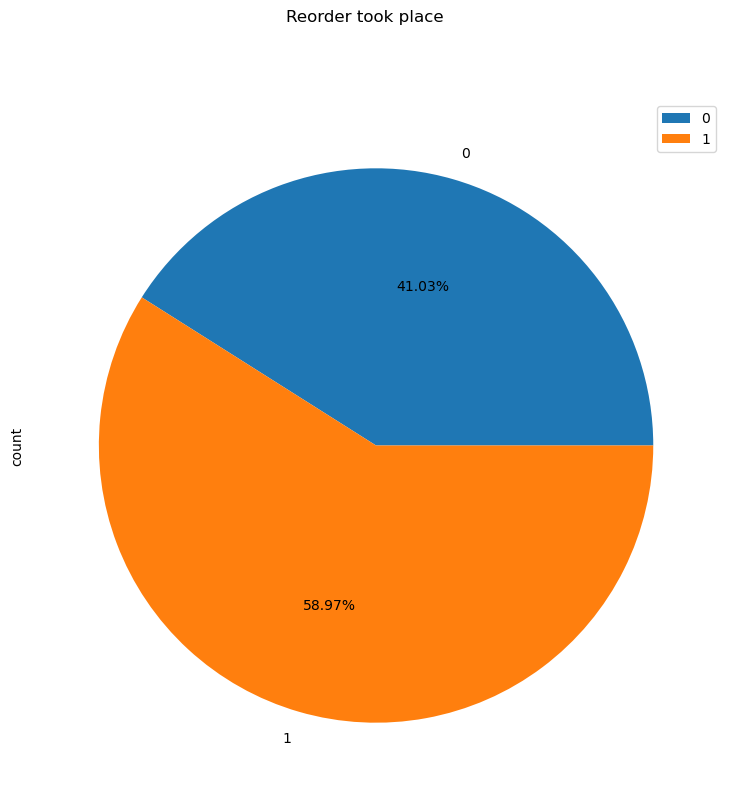

In [35]:
df.groupby('reordered')['user_id'].agg(['count']).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Reorder took place',figsize=(9,9))

array([<Axes: ylabel='count'>], dtype=object)

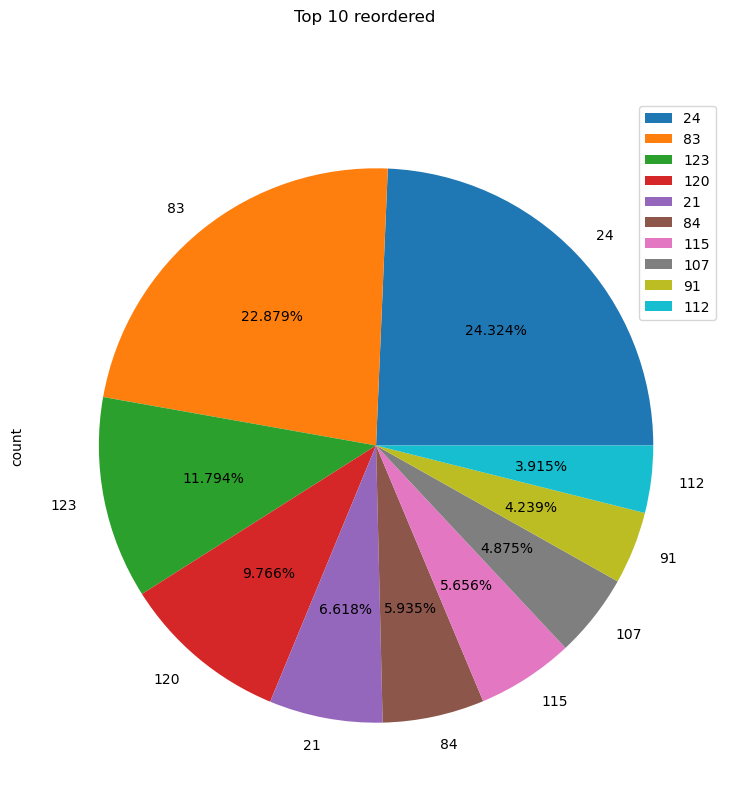

In [36]:
df.groupby('product_id')['reordered'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Top 10 reordered',figsize=(9,9))

### Perdicted

In [70]:
# Create a copy of the original DataFrame to avoid modifying it directly
df_2 = df.copy()

# Convert the 'department' column (categorical) into numeric codes
df_2['department'] = pd.factorize(df_2['department'])[0]

# Convert the 'product_name' column into numeric codes
df_2['product_name'] = pd.factorize(df_2['product_name'])[0]

# Convert the 'order_time_list' (morning, afternoon, etc.) into numeric codes
df_2['order_time_list'] = pd.factorize(df_2['order_time_list'])[0]

# Convert the 'order_number_group' (order count ranges) into numeric codes
df_2['order_number_group'] = pd.factorize(df_2['order_number_group'])[0]

In [71]:
df_2.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
order_id,1.000000,0.000515,0.004791,0.002015,0.001039,-0.001407,0.000114,-0.003230,0.002207,0.000691,-0.000309,0.000051,-0.001932,0.002050
user_id,0.000515,1.000000,-0.003244,-0.001796,-0.002050,-0.000456,0.000300,0.001180,-0.001780,0.001475,0.001004,0.000816,-0.000636,-0.001968
order_number,0.004791,-0.003244,1.000000,0.013848,-0.038352,-0.264725,0.000227,-0.000380,0.302881,0.001811,-0.016861,-0.025992,0.033759,0.737192
order_dow,0.002015,-0.001796,0.013848,1.000000,0.010854,-0.028193,-0.001458,-0.009274,-0.008689,0.003504,0.008827,0.012619,-0.007459,0.009695
order_hour_of_day,0.001039,-0.002050,-0.038352,0.010854,1.000000,0.002037,-0.000077,-0.015119,-0.019492,-0.007886,0.001115,0.004335,-0.811832,-0.032473
days_since_prior_order,-0.001407,-0.000456,-0.264725,-0.028193,0.002037,1.000000,0.005261,0.046606,-0.031522,0.001193,0.008947,0.014973,-0.003173,-0.247537
product_id,0.000114,0.000300,0.000227,-0.001458,-0.000077,0.005261,1.000000,0.008186,0.004256,0.062107,-0.010147,0.011541,-0.000049,-0.000564
add_to_cart_order,-0.003230,0.001180,-0.000380,-0.009274,-0.015119,0.046606,0.008186,1.000000,-0.133566,0.029746,0.040189,0.067372,0.021936,0.005992
reordered,0.002207,-0.001780,0.302881,-0.008689,-0.019492,-0.031522,0.004256,-0.133566,1.000000,-0.037645,-0.057460,-0.122769,0.015182,0.251050
department_id,0.000691,0.001475,0.001811,0.003504,-0.007886,0.001193,0.062107,0.029746,-0.037645,1.000000,0.253983,0.183693,0.007069,0.003003


<Axes: >

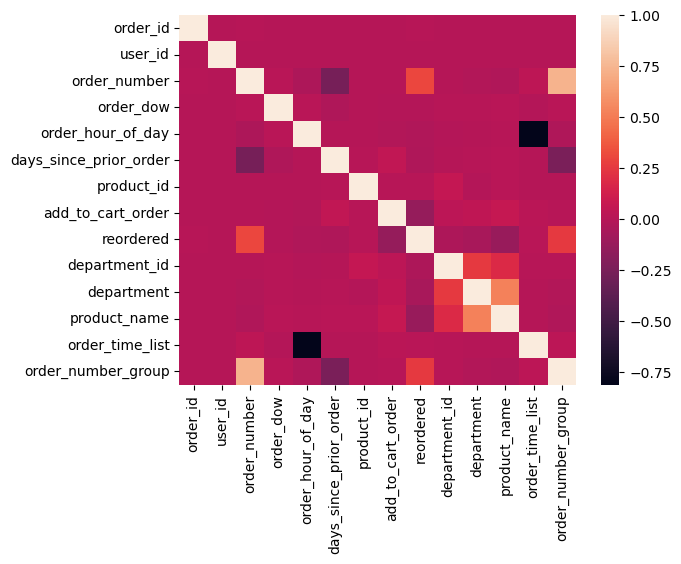

In [40]:
sns.heatmap(df_2.corr())

* This heatmap shows the correlation between numeric features in the dataset.
* Lighter colors indicate stronger positive correlation, darker colors show negative correlation.
* For example, 'department' and 'department_id' are highly correlated, as expected.
* Useful for understanding feature relationships before modeling.


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing

In [ ]:
# Select features (X) from columns 0 to 12 (13 total columns)
X= df_2.values[:,0:13]
# Select target variable (Y) from column 13 (e.g., reordered or any other label you're predicting)
Y= df_2.values[:, 13]

In [ ]:
# Standardize the feature data: mean = 0, std = 1
# This helps many models perform better (especially those sensitive to feature scale)
X= preprocessing.scale(X)

In [ ]:
# Split the dataset into training and testing sets
# 70% of data is used for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Initialize the Random Forest Regressor with default settings
rfr = RandomForestRegressor()

In [ ]:
# Train (fit) the model using the training features and target
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Evaluate the model's performance on the training data
score = rfr.score(X_train,y_train)
score

1.0

score = 1.0 means the model explains 100% of the variance in the training data — a perfect fit.

In [ ]:
# Use the trained Random Forest model to predict the target values for the test set
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred5)
rscore

1.0

In [50]:
df_2['Prediction']=rfr.predict(X)

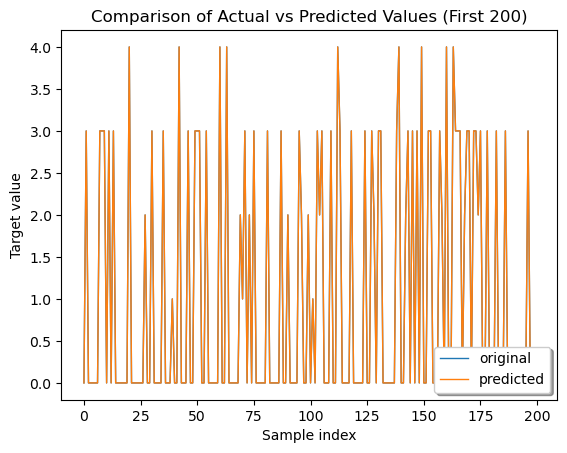

In [72]:
plt.plot(x_ax[:200], y_test[:200], linewidth=1, label="original")
plt.plot(x_ax[:200], y_pred5[:200], linewidth=1, label="predicted")
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend(loc='lower right', fancybox=True, shadow=True)
plt.title("Comparison of Actual vs Predicted Values (First 200)")
plt.show()


* The orange line represents the model's predictions.
* The blue line shows the original target values.
* In most places, the two lines overlap closely, which confirms the earlier result (R² = 1.0).
* However, the target variable seems to have very few unique values, likely discrete classes like 0, 1, 2, 3, etc.